In [1]:

from occupancy.datasets.nuscenes import NuScenesDataset
from nuscenes.nuscenes import NuScenes
from torch import Tensor
nusc = NuScenesDataset(
    version='v1.0-trainval',
    data_dir='/mnt/f/datasets/nuscenes/',
    verbose=True)
from occupancy.pipelines.diffusion3d import Diffusion3d, Diffusion3dInput
import torch

In [2]:
model = Diffusion3d(1)
model.load_state_dict(torch.load('/home/zc2309/workspace/occupancy/models/diffusion3d-cls1.pt', mmap=True), assign=True)
model.voxel_autoencoderkl.load_state_dict(torch.load('/home/zc2309/workspace/occupancy/models/autoencoderkl-cls1.pt', mmap=True), assign=True)


<All keys matched successfully>

100%|██████████| 20/20 [00:01<00:00, 13.59it/s]


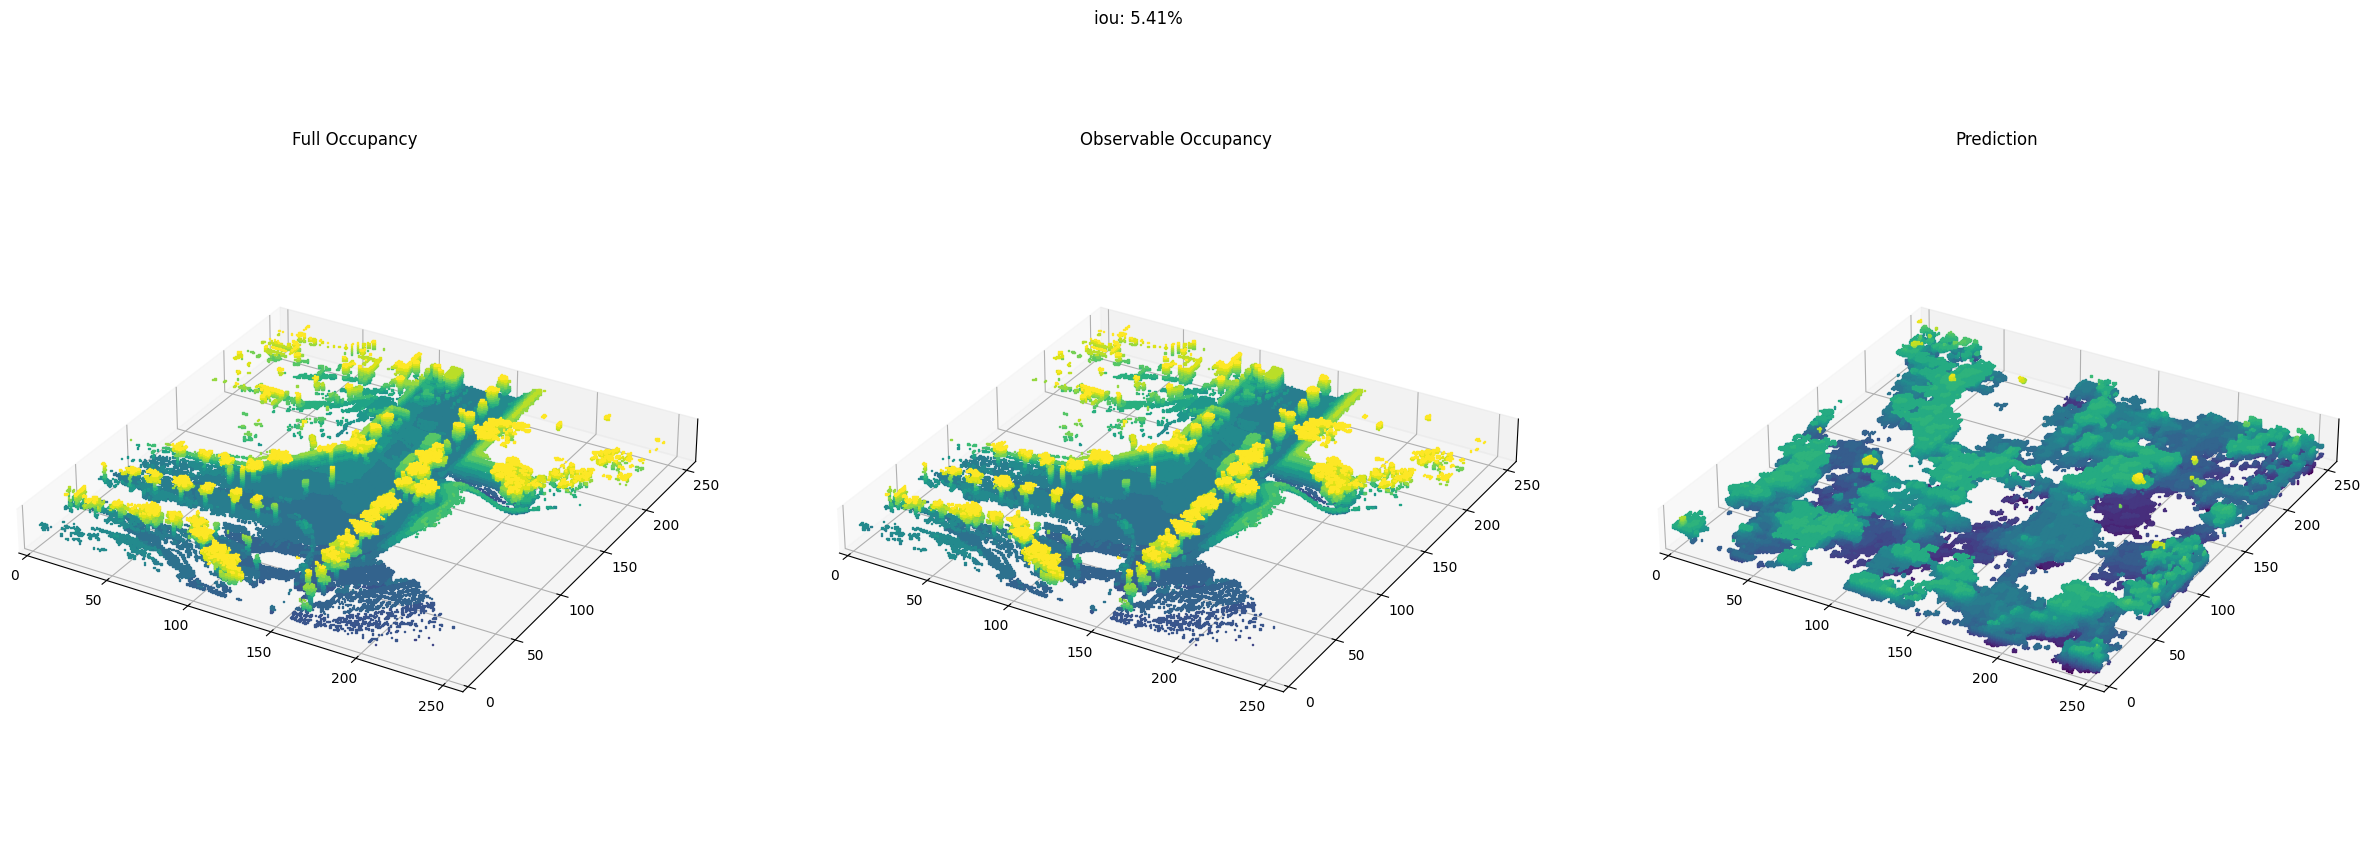

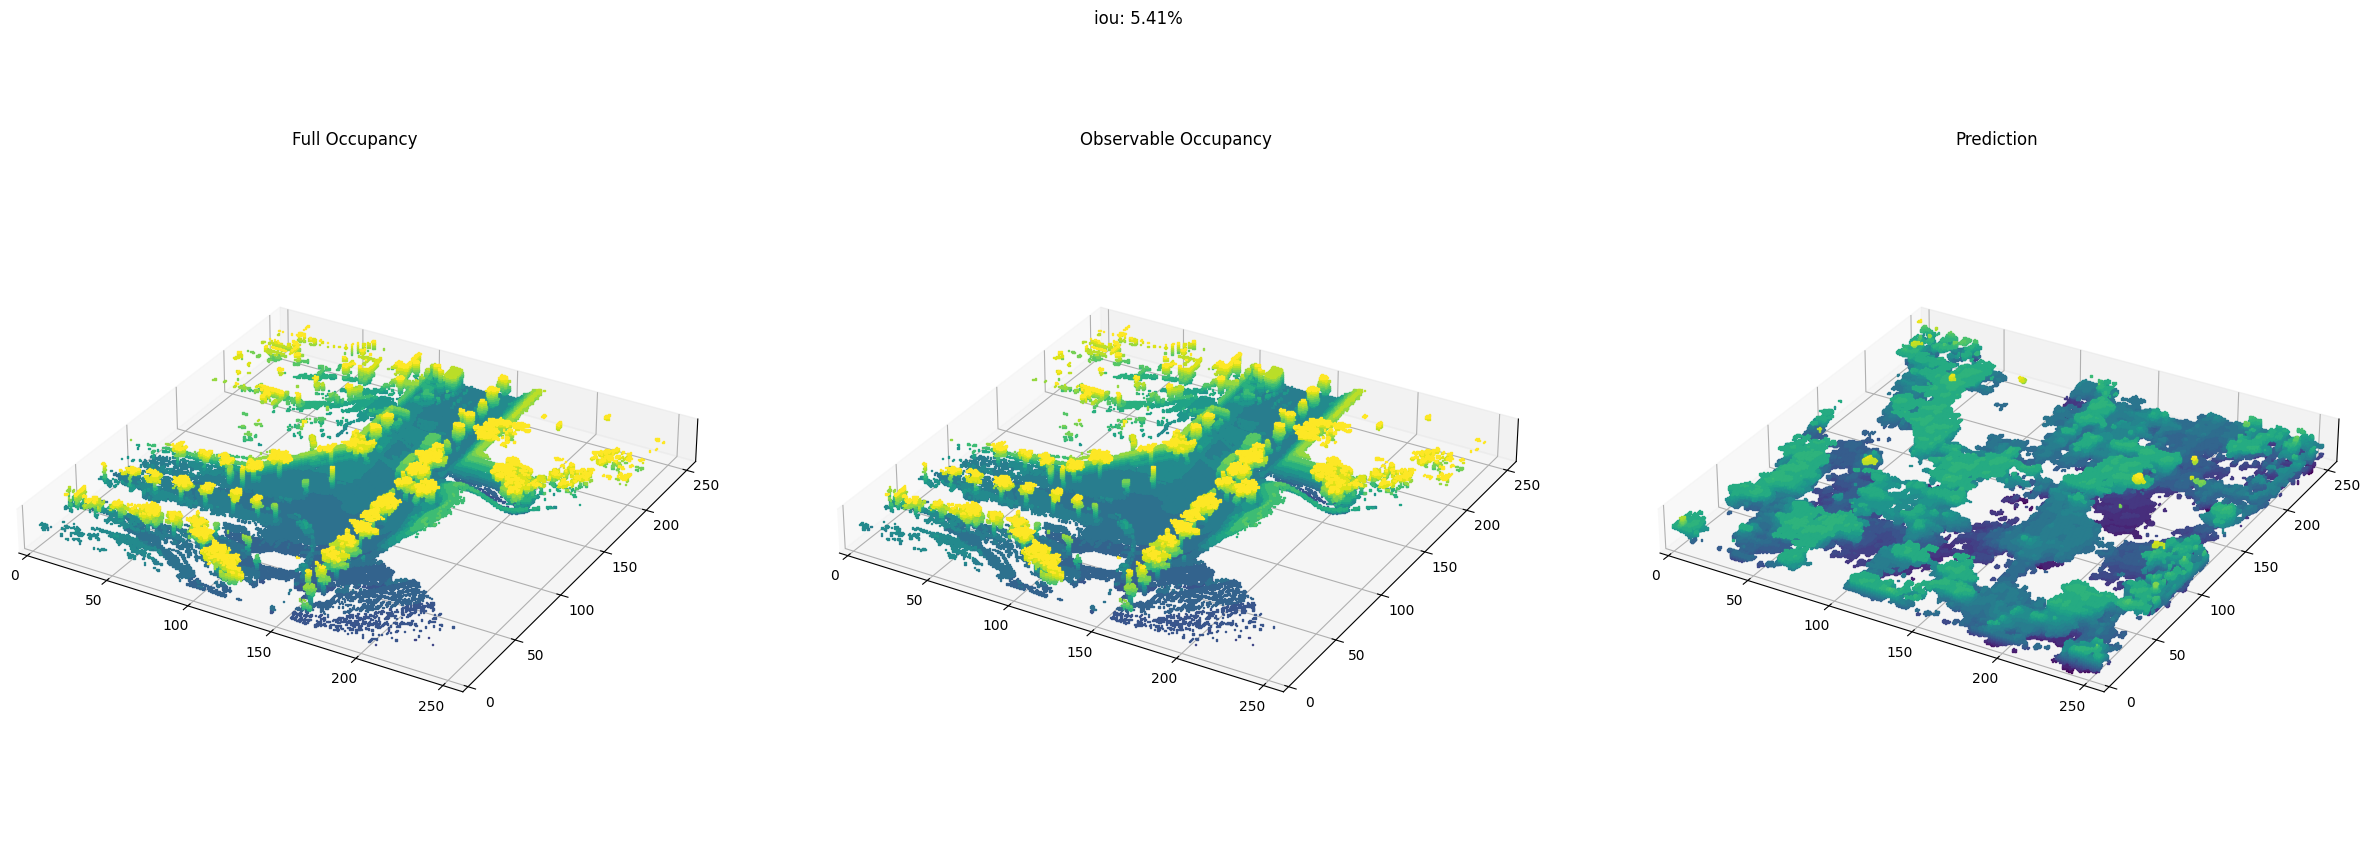

In [14]:

data = nusc[5]
dtype = torch.bfloat16
device = torch.device('cuda')
model.to(device, dtype).eval()
model_input = Diffusion3dInput.from_nuscenes_dataset_item(data, dtype=dtype, device=device)
with torch.inference_mode():
    output = model.generate(model_input.images, model_input.occupancy, num_inference_steps=20, guidance_scale=0)

output.figure